**Criando o dataset**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Dados da população (exemplo)
populacao = np.random.normal(loc=50, scale=10, size=10000)  # População com distribuição normal

# Amostra retirada da população (exemplo)
amostra = np.random.normal(loc=50, scale=10, size=500)

**QQ Plot**

In [2]:
# Calcular a média e o desvio padrão da amostra
media = np.mean(amostra)
desvio_padrao = np.std(amostra)

# Padronizar os valores da amostra
amostra_padronizada = (amostra - media) / desvio_padrao

Gerando o QQ Plot

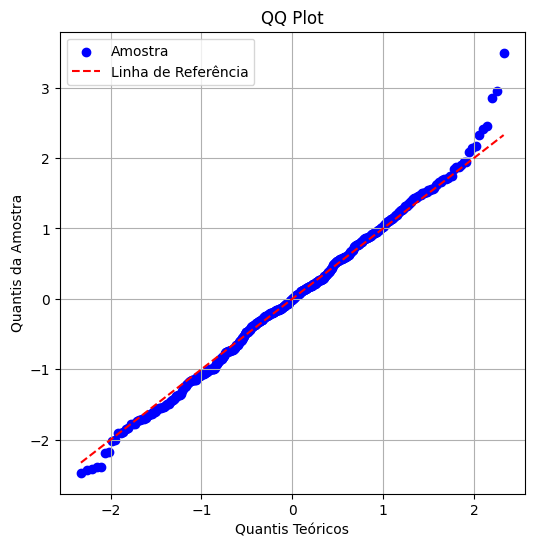

In [3]:
# Matplotlib pyplot - API de plotagem
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.stats as stats

# Gerar uma amostra de uma distribuição normal com a mesma média e desvio padrão que a amostra
amostra=amostra_padronizada
media = np.mean(amostra)
desvio_padrao = np.std(amostra)
distribuicao_normal = np.random.normal(media, desvio_padrao, len(amostra))

# Ordenar os dados
amostra_ordenada = np.sort(amostra)
distribuicao_normal_ordenada = np.sort(distribuicao_normal)

# Calcular os quantis teóricos
quantis_teoricos = stats.norm.ppf(np.linspace(0.01, 0.99, len(amostra)))

# Plotar o QQ plot
plt.figure(figsize=(6, 6))
plt.scatter(quantis_teoricos, amostra_ordenada, color='blue', label='Amostra')
plt.plot(quantis_teoricos, quantis_teoricos, color='red', linestyle='--', label='Linha de Referência')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis da Amostra')
plt.title('QQ Plot')
plt.legend()
plt.grid(True)
plt.show()

**Teste de normalidade**

In [4]:
import numpy as np
import scipy.stats as stats

# Gerando uma amostra de dados (exemplo)
amostra = np.random.normal(loc=50, scale=10, size=500)  # Amostra com distribuição normal

# Realizando o Teste de Shapiro-Wilk
stat, p = stats.shapiro(amostra)

# Resultado do teste
print(f"Estatística do teste: {stat}")
print(f"Valor p: {p}")

# Verifica se p-valor é maior que 0.05 para aceitar H0 (a amostra segue uma distribuição normal)
if p > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra não segue uma distribuição normal.")

Estatística do teste: 0.9977831291106858
Valor p: 0.7596705456557068
A amostra parece seguir uma distribuição normal.


In [5]:
# Realizando o Teste de Kolmogorov-Smirnov
stat, p = stats.kstest(amostra, 'norm', args=(np.mean(amostra), np.std(amostra)))

# Resultado do teste
print(f"Estatística do teste: {stat}")
print(f"Valor p: {p}")

# Verifica se p-valor é maior que 0.05 para aceitar H0 (a amostra segue uma distribuição normal)
if p > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra não segue uma distribuição normal.")

Estatística do teste: 0.02750135692856437
Valor p: 0.8335904265776527
A amostra parece seguir uma distribuição normal.


Soma das frequências observadas: 500
Soma das frequências esperadas: 500.00000000000006
Qui-quadrado: 8.638532201845962
Valor p: 0.37370000082402277
A amostra segue a distribuição populacional.


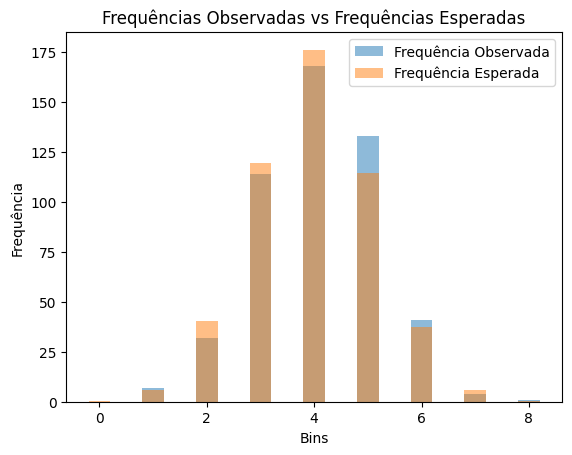

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Exemplo de dados (substitua pelos seus dados reais)
np.random.seed(0)  # Para reprodutibilidade
populacao = np.random.normal(loc=0, scale=1, size=10000)  # População simulada
amostra = np.random.normal(loc=0, scale=1, size=500)       # Amostra simulada

# Definindo os bins (intervalos) para as frequências
# Usaremos os mesmos bins para ambas as frequências
bins = np.linspace(-4, 4, 10)  # 10 bins entre -4 e 4

# Frequências observadas na amostra e esperadas na população
frequencia_observada, _ = np.histogram(amostra, bins=bins)
frequencia_esperada, _ = np.histogram(populacao, bins=bins)

# Verifica se as somas das frequências são iguais
soma_observada = np.sum(frequencia_observada)
soma_esperada = np.sum(frequencia_esperada)

# Normalizando as frequências esperadas para que a soma iguale a soma das frequências observadas
frequencia_esperada = frequencia_esperada * (soma_observada / soma_esperada)

print(f"Soma das frequências observadas: {soma_observada}")
print(f"Soma das frequências esperadas: {np.sum(frequencia_esperada)}")

# Realizando o teste qui-quadrado de aderência
chi2, p = stats.chisquare(f_obs=frequencia_observada, f_exp=frequencia_esperada)

# Resultado do teste
print(f"Qui-quadrado: {chi2}")
print(f"Valor p: {p}")

# Verifica se p-valor é maior que 0.05 para aceitar H0 (a amostra segue a distribuição populacional)
if p > 0.05:
    print("A amostra segue a distribuição populacional.")
else:
    print("A amostra não segue a distribuição populacional.")

# Visualizando as frequências
plt.bar(np.arange(len(frequencia_observada)), frequencia_observada, alpha=0.5, label='Frequência Observada', width=0.4)
plt.bar(np.arange(len(frequencia_esperada)), frequencia_esperada, alpha=0.5, label='Frequência Esperada', width=0.4)
plt.xlabel('Bins')
plt.ylabel('Frequência')
plt.title('Frequências Observadas vs Frequências Esperadas')
plt.legend()
plt.show()